<a href="https://colab.research.google.com/github/R0N3ldrt/Thesis/blob/main/spectrum-1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Enviroment

## Loading Drive and folders

In [1]:
# BLOQUE PARA USAR DESDE COLAB

# Google drive loading as work station for local-usage of the files.
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

#-----------------------------------------------------------------------------

Mounted at /content/gdrive


In [2]:
# Lista para cambiar los paths rapido.
workers = ["Ronald", "Local"]

# Cambiar el numero aqui para cambiar los paths.
worker = workers[0]

if worker == "Ronald":
  path= "/content/gdrive/MyDrive/Thesis_Workstation/ANN_dataset"
else: path = os.getcwd()

## Loading Necesary Libraries

In [3]:
# Importing necesary libraries
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

import warnings
warnings.simplefilter("ignore", UserWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading Data and Pre-Procesing

In [33]:
data_path=path+"/Spectrum"

qpsk_path="/QPSK/A.10hops100km/"
qam_path="/16QAM/A.10hops100km"

#file_name="/dataSet_Spectrum_Samples_QPSK_37GHz_LongHaul_output_10x100.xlsx"
file_name="/QPSK_dummy.xlsx"
# Skipping first row since only contain "Frequency" headers
df_qpsk=pd.read_excel(data_path+qpsk_path+file_name, sheet_name = "Sheet1", skiprows=1)

#file_name="/dataSet_Spectrum_Samples_16QAM_75GHz_LongHaul_output_10x100.xlsx"
file_name="/16QAM_dummy.xlsx"
df_qam=pd.read_excel(data_path+qam_path+file_name, sheet_name = "Sheet1", skiprows=1)

#Diff in column 5 to 1,286 0.03125

In [14]:
#dump_file = dict desireed to be saved
#filename = just the name of the file (file saved on "pickle_folder")

def pickle_out(dump_file, filename):
  filepath = path+"/pickle_folder/"+str(filename)+".pickle"
  pickleout = open(filepath, "wb")
  pickle.dump(dump_file, pickleout)
  pickleout.close()

def pickle_in(filename):
  filepath = path+"/pickle_folder/"+str(filename)+".pickle"
  picklein = open(filepath, "rb")
  loaded_dict = pickle.load(picklein)
  return loaded_dict

## Aggregator

In [15]:
def prime_number_finder(stop_gap, total_num_of_data):
  prime_nums = []
  i=2
  while i <= stop_gap:
    if (total_num_of_data % i==0):
      prime_nums.append(i)
    i+=1
  return prime_nums

def aggreagator_selection(stop_gap=25, total_num_of_data=1281):
  current_freq_offset = 0.03125
  
  # Find the prime numbers where the total_num_of_data is divisible
  prime_nums = prime_number_finder(stop_gap, total_num_of_data)
  
  # Find the offsets of the new aggregators
  new_freq_offsets = []
  for nums in prime_nums:
    freq_offset = current_freq_offset*(nums-1)
    new_freq_offsets.append(freq_offset)

  # Ask the user for the desired aggregator
  print('Please select one of the following prime number to conduct the aggregation {} with frequencies offsets of {}(PHz) respectively. (Current Freq offset is 0.03125 PHz)'.format(prime_nums, new_freq_offsets))
  while True:
    user_selection = input('Prime number to conduct the aggregation? ')
    if int(user_selection) not in prime_nums:
      print('Please select one of the available prime numbers. (Current selection is not avaliable)')
    else:
      break
  return int(user_selection)

def aggreagator(df, stop_gap=25, total_num_of_data=1281):
  agg_num = aggreagator_selection(stop_gap, total_num_of_data)
  
  # Creating new df of aggregate values
  agg_df = pd.DataFrame()
  agg_df = df[df.columns[0:5]]

  agg=0
  loop_cnt=0
  init_column_cnt = 5
  while agg<=total_num_of_data:
    loop_cnt+=1
    # Obtain current last columns stop
    agg=agg_num+init_column_cnt
    # Select working columns
    new_df = df[df.columns[init_column_cnt:agg]]

    init_column_cnt += (agg_num)
    #print(init_column_cnt)
    # Get average of freq values for new header
    headers = list(new_df.columns.values)
    headers_array = np.asarray(headers)
    new_header_name = np.mean(headers_array)

    # Add aggragated values to new df
    agg_df[str(new_header_name)] = new_df.mean(axis = 1)
  agg_dict = agg_df.to_dict()
  return agg_df, agg_dict


In [42]:
# QPSK AGG
stop = 7
QPSK_agg_df, QPSK_agg_dict = aggreagator(df_qpsk, stop_gap=100, total_num_of_data=1281)
pickle_out(QPSK_agg_dict, "test_agg_spectrum_QPSK_"+str(stop))

Please select one of the following prime number to conduct the aggregation [3, 7, 21, 61] with frequencies offsets of [0.0625, 0.1875, 0.625, 1.875](PHz) respectively. (Current Freq offset is 0.03125 PHz)
Prime number to conduct the aggregation? 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [35]:
# QPSK QAM
stop = 7
QAM_agg_df, QAM_agg_dict = aggreagator(df_qam, stop_gap=100, total_num_of_data=1281)
pickle_out(QAM_agg_dict, "agg_spectrum_QAM_"+str(stop))

Please select one of the following prime number to conduct the aggregation [3, 7, 21, 61] with frequencies offsets of [0.0625, 0.1875, 0.625, 1.875](PHz) respectively. (Current Freq offset is 0.03125 PHz)
Prime number to conduct the aggregation? 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [326]:
pickle_dummy_dict = pickle_in("agg_spectrum_QPSK_7")

print(pickle_dummy_dict.keys())
pickle_dummy_dict['-19.90625'].values()

dict_keys(['sampleid', 'Channels', 'Distance_km', 'power_dBm', '#node', '-19.90625', '-19.6875', '-19.46875', '-19.25', '-19.03125', '-18.8125', '-18.59375', '-18.375', '-18.15625', '-17.9375', '-17.71875', '-17.5', '-17.28125', '-17.0625', '-16.84375', '-16.625', '-16.40625', '-16.1875', '-15.96875', '-15.75', '-15.53125', '-15.3125', '-15.09375', '-14.875', '-14.65625', '-14.4375', '-14.21875', '-14.0', '-13.78125', '-13.5625', '-13.34375', '-13.125', '-12.90625', '-12.6875', '-12.46875', '-12.25', '-12.03125', '-11.8125', '-11.59375', '-11.375', '-11.15625', '-10.9375', '-10.71875', '-10.5', '-10.28125', '-10.0625', '-9.84375', '-9.625', '-9.40625', '-9.1875', '-8.96875', '-8.75', '-8.53125', '-8.3125', '-8.09375', '-7.875', '-7.65625', '-7.4375', '-7.21875', '-7.0', '-6.78125', '-6.5625', '-6.34375', '-6.125', '-5.90625', '-5.6875', '-5.46875', '-5.25', '-5.03125', '-4.8125', '-4.59375', '-4.375', '-4.15625', '-3.9375', '-3.71875', '-3.5', '-3.28125', '-3.0625', '-2.84375', '-2.625

dict_values([-52.58722602859268, -51.777602184478255, -53.00329057493259, -55.85847203872787, -54.2264411002062, -54.25347624625919, -53.365185015537925, -55.05460739835035, -52.92877612025617, -52.734421550389584, -58.74401826893385, -48.63746686499979, -56.44660670882369, -48.27247617292802, -53.83972599255794, -54.86937274897692, -55.57411278690153, -50.50396703594872, -49.60572093699432, -48.25319561224723, -52.59046914587442, -57.682477991353736, -52.252890223122314, -50.8665340356822, -54.364867952225744, -53.78109273171549, -56.467180752635876, -54.85119620354811, -51.14296407836939, -52.152817983536906, -53.782106603484635, -53.73058069785552, -58.21894447645663, -52.03413220002404, -57.14900409612067, -51.53686851443755, -56.55314159430914, -55.86559874058809, -50.81783926823658, -53.23959353985477, -55.558113381428825, -54.21257727879089, -52.67069707227461, -52.89647545667034, -56.07426908330729, -54.99347767231384, -54.90215012347203, -50.34181293124205, -53.14101521054793,

##Dummy Model

In [37]:
def get_dummy_spectrum(df):
  new_df = df.groupby(['#node']).mean()
  new_df.drop(['sampleid', 'Channels', 'power_dBm'], axis = 1, inplace = True)
  dummy_dict = new_df.to_dict()
  
  return new_df, dummy_dict

In [328]:
#new_df = 
#node	| Distance_km	|-20	      |-19.96875	|-19.9375																						
#1	    | 0.0	        |-52.955056	|-54.126681	|-52.713840	
#2	    | 100.0	      |-51.813386	|-53.194155	|-52.697528
#3	    | 200.0	      |-55.626777	|-54.634329	|-54.702958

#dummy_dict.keys() = dict_keys(['Distance_km', -20, -19.96875, -19.9375, -19.90625, -19.875, -19.84375...
#dummy_dict[-20].values() = dict_values([-52.955056039, -51.813386274, -55.626777088])

In [38]:
# Dummy Model QPSK
QPSK_dummy_df, QPSK_dummy_dict = get_dummy_spectrum(QPSK_agg_df)
pickle_out(QPSK_dummy_dict, "dummy_AGG_spectrum_QPSK")

In [39]:
# Dummy Model QAM
QAM_dummy_df, QAM_dummy_dict = get_dummy_spectrum(QAM_agg_df)
pickle_out(QAM_dummy_dict, "dummy_AGG_spectrum_QAM")

In [331]:
pickle_dummy_dict = pickle_in("dummy_spectrum_full_QPSK")
pickle_dummy_dict['Distance_km'].values()

dict_values([0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0])

# Processing

In [43]:
# Aggregated model
pickle_agg_QPSK_dict = pickle_in("test_agg_spectrum_QPSK_7")
pickle_agg_AQM_dict = pickle_in("test_agg_spectrum_QAM_7")

# Dummy models
pickle_dummy_QPSK_dict = pickle_in("test_dummy_AGG_spectrum_QPSK")
pickle_dummy_QAM_dict = pickle_in("test_dummy_AGG_spectrum_QAM")

In [22]:
#new_df = 
#node	  | Distance_km	|-20	      |-19.96875	|-19.9375																						
#1	    | 0.0	        |-52.955056	|-54.126681	|-52.713840	
#2	    | 100.0	      |-51.813386	|-53.194155	|-52.697528
#3	    | 200.0	      |-55.626777	|-54.634329	|-54.702958

#dummy_dict.keys() = dict_keys(['Distance_km', -20, -19.96875, -19.9375, -19.90625, -19.875, -19.84375...
#dummy_dict[-20].values() = dict_values([-52.955056039, -51.813386274, -55.626777088])

In [46]:
print(pickle_agg_QPSK_dict.keys())
pickle_dummy_QAM_dict['-39.90625'].values()

dict_keys(['sampleid', 'Channels', 'Distance_km', 'power_dBm', '#node', '-19.90625', '-19.6875', '-19.46875', '-19.25', '-19.03125', '-18.8125', '-18.59375', '-18.375', '-18.15625', '-17.9375', '-17.71875', '-17.5', '-17.28125', '-17.0625', '-16.84375', '-16.625', '-16.40625', '-16.1875', '-15.96875', '-15.75', '-15.53125', '-15.3125', '-15.09375', '-14.875', '-14.65625', '-14.4375', '-14.21875', '-14.0', '-13.78125', '-13.5625', '-13.34375', '-13.125', '-12.90625', '-12.6875', '-12.46875', '-12.25', '-12.03125', '-11.8125', '-11.59375', '-11.375', '-11.15625', '-10.9375', '-10.71875', '-10.5', '-10.28125', '-10.0625', '-9.84375', '-9.625', '-9.40625', '-9.1875', '-8.96875', '-8.75', '-8.53125', '-8.3125', '-8.09375', '-7.875', '-7.65625', '-7.4375', '-7.21875', '-7.0', '-6.78125', '-6.5625', '-6.34375', '-6.125', '-5.90625', '-5.6875', '-5.46875', '-5.25', '-5.03125', '-4.8125', '-4.59375', '-4.375', '-4.15625', '-3.9375', '-3.71875', '-3.5', '-3.28125', '-3.0625', '-2.84375', '-2.625

dict_values([-51.967543919, -50.006399713])

In [62]:
def freq_selector(pickle_dict):
  invalid = {'Distance_km','sampleid', 'Channels', 'power_dBm', '#node'}
  freqs = []
  for i in pickle_dict:
    if i not in invalid:
      freqs.append(i)
  return np.array(freqs)
freq_selector(pickle_agg_QPSK_dict)

array(['-19.90625', '-19.6875', '-19.46875', '-19.25', '-19.03125',
       '-18.8125', '-18.59375', '-18.375', '-18.15625', '-17.9375',
       '-17.71875', '-17.5', '-17.28125', '-17.0625', '-16.84375',
       '-16.625', '-16.40625', '-16.1875', '-15.96875', '-15.75',
       '-15.53125', '-15.3125', '-15.09375', '-14.875', '-14.65625',
       '-14.4375', '-14.21875', '-14.0', '-13.78125', '-13.5625',
       '-13.34375', '-13.125', '-12.90625', '-12.6875', '-12.46875',
       '-12.25', '-12.03125', '-11.8125', '-11.59375', '-11.375',
       '-11.15625', '-10.9375', '-10.71875', '-10.5', '-10.28125',
       '-10.0625', '-9.84375', '-9.625', '-9.40625', '-9.1875',
       '-8.96875', '-8.75', '-8.53125', '-8.3125', '-8.09375', '-7.875',
       '-7.65625', '-7.4375', '-7.21875', '-7.0', '-6.78125', '-6.5625',
       '-6.34375', '-6.125', '-5.90625', '-5.6875', '-5.46875', '-5.25',
       '-5.03125', '-4.8125', '-4.59375', '-4.375', '-4.15625', '-3.9375',
       '-3.71875', '-3.5', '-3.28125

In [63]:
pickle_agg_QPSK_dict['-19.90625'].values()

dict_values([-52.587226028571436, -51.77760218571429, -53.00329057428571, -55.85847203714286, -54.2264411, -54.25347624571429, -53.36518501428572, -55.05460739714285, -52.92877612142858, -52.73442155142857, -58.74401826857143, -48.63746686428571, -56.44660670857143, -48.272476174285714, -53.83972599142857, -54.869372750000004, -55.57411278571429, -50.50396703714286, -49.605720937142856, -48.25319561285714, -52.590469144285706, -57.68247799142857, -52.25289022142857, -50.866534035714274, -54.36486795142857, -53.78109273142858, -56.46718075285714, -54.851196202857146, -51.14296407857143, -52.15281798285714])

In [125]:
def focus_selector(eval_df, threshhold=0.95):
  # Find min common multipler (smallesr we can break the slots)
  non_escencial_data_col = 5

  number_of_data = eval_df.shape[1]-non_escencial_data_col
  min_prime_num = min(prime_number_finder(stop_gap=100, total_num_of_data=number_of_data))
  print(min_prime_num)
  
  current = non_escencial_data_col
  while current <= number_of_data:
    end_range = current+(min_prime_num)
    new_df = eval_df[eval_df.columns[current:end_range]]
    display(new_df)
    current+=min_prime_num
    if current == 11:
      break
  return new_df

In [126]:
focus_selector(QPSK_agg_df, threshhold=0.95)

3


,-19.90625,-19.6875,-19.46875
0,-52.587226,-51.639855,-55.717829
1,-51.777602,-50.071900,-51.820396
2,-53.003291,-51.927132,-51.786324
3,-55.858472,-51.123550,-50.293180
4,-54.226441,-58.518877,-55.839857
5,-54.253476,-53.622658,-54.590808
6,-53.365185,-52.229170,-57.702209
7,-55.054607,-54.578638,-53.377937
8,-52.928776,-54.875285,-53.936992
9,-52.734422,-49.081192,-52.050749


,-19.25,-19.03125,-18.8125
0,-54.477069,-57.703401,-52.539051
1,-53.844308,-54.162452,-50.009366
2,-51.125549,-53.373583,-52.509303
3,-52.420646,-52.522811,-50.680486
4,-53.153048,-55.180692,-53.771059
5,-54.478774,-56.936073,-58.275509
6,-54.709939,-55.829212,-55.310105
7,-52.901193,-49.408506,-54.641298
8,-55.593499,-57.263353,-50.413282
9,-53.536714,-50.338268,-50.214136


,-19.25,-19.03125,-18.8125
0,-54.477069,-57.703401,-52.539051
1,-53.844308,-54.162452,-50.009366
2,-51.125549,-53.373583,-52.509303
3,-52.420646,-52.522811,-50.680486
4,-53.153048,-55.180692,-53.771059
5,-54.478774,-56.936073,-58.275509
6,-54.709939,-55.829212,-55.310105
7,-52.901193,-49.408506,-54.641298
8,-55.593499,-57.263353,-50.413282
9,-53.536714,-50.338268,-50.214136


In [110]:
display(QPSK_agg_df)

,sampleid,Channels,Distance_km,power_dBm,#node,-19.90625,-19.6875,-19.46875,-19.25,-19.03125,...,17.9375,18.15625,18.375,18.59375,18.8125,19.03125,19.25,19.46875,19.6875,19.90625
0,1,1,0,-2,1,-52.587226,-51.639855,-55.717829,-54.477069,-57.703401,...,-52.478939,-56.384460,-58.504985,-51.340376,-55.550832,-55.293655,-54.279691,-54.448426,-53.622937,-54.477459
1,2,1,0,-2,1,-51.777602,-50.071900,-51.820396,-53.844308,-54.162452,...,-55.738654,-53.058018,-51.395465,-52.079017,-54.961729,-54.393157,-51.270081,-51.457837,-55.307942,-52.117826
2,3,1,0,-2,1,-53.003291,-51.927132,-51.786324,-51.125549,-53.373583,...,-55.594851,-54.258191,-51.131458,-50.958598,-53.486158,-53.949721,-55.707262,-57.138023,-52.747931,-52.050226
3,4,1,0,-2,1,-55.858472,-51.123550,-50.293180,-52.420646,-52.522811,...,-54.698019,-54.342526,-52.673740,-52.398888,-55.729014,-53.823017,-55.934854,-53.091325,-52.418074,-51.968700
4,5,1,0,-2,1,-54.226441,-58.518877,-55.839857,-53.153048,-55.180692,...,-52.442856,-53.241007,-55.614867,-52.777216,-56.568355,-55.997296,-57.108200,-54.541932,-52.336558,-57.730869
5,6,1,0,-2,1,-54.253476,-53.622658,-54.590808,-54.478774,-56.936073,...,-52.171231,-52.765335,-49.677293,-52.281162,-53.419937,-54.657525,-55.553398,-52.218163,-54.366564,-50.739133
6,7,1,0,-2,1,-53.365185,-52.229170,-57.702209,-54.709939,-55.829212,...,-54.010897,-55.835098,-52.659471,-56.152912,-53.777794,-53.664292,-55.257934,-56.747509,-56.690005,-57.213991
7,8,1,0,-2,1,-55.054607,-54.578638,-53.377937,-52.901193,-49.408506,...,-50.849076,-54.260737,-52.523848,-56.732797,-54.331342,-57.257458,-53.610594,-53.501007,-55.471521,-53.525728
8,9,1,0,-2,1,-52.928776,-54.875285,-53.936992,-55.593499,-57.263353,...,-50.605684,-59.581676,-52.440328,-51.721547,-54.607812,-56.662865,-54.014089,-54.819737,-50.826348,-49.566541
9,10,1,0,-2,1,-52.734422,-49.081192,-52.050749,-53.536714,-50.338268,...,-53.842237,-50.478296,-51.435075,-52.218628,-53.654144,-52.720850,-51.132912,-51.684884,-60.515948,-52.062009


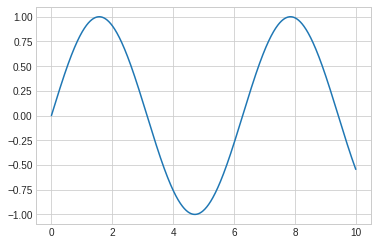

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))